# Numerical Computing with Python and Numpy

![](https://i.imgur.com/mg8O3kd.png)

 The best way to learn the material is to execute the code and experiment with it yourself. \\


The "data" in Data Analysis typically refers to numerical data, e.g., stock prices, sales figures, sensor measurements, sports scores, database tables, etc.
The Numpy library provides specialized data structures, functions, and other tools for numerical computing in Python.
Let's work through an example to see why & how to use Numpy for working with numerical data.

Suppose we want to use climate data like the temperature, rainfall, and humidity to determine if a region is well suited for growing apples. A simple approach for doing this would be to formulate the relationship between the annual yield of apples (tons per hectare) and the climatic conditions like the average temperature (in degrees Fahrenheit), rainfall (in millimeters) & average relative humidity (in percentage) as a linear equation.

yield_of_apples = w1 * temperature + w2 * rainfall + w3 * humidity

After observing some statical analysis of historical data, we might come up with reasonable values for the weights w1, w2, and w3. Here's an example set of values:

In [21]:
w1, w2, w3 = 0.3, 0.2, 0.5

Given some climate data for a region, we can now predict the yield of apples. Here's some sample data:

<img src="https://i.imgur.com/TXPBiqv.png" style="width:320px;">

To begin, we can define some variables to record climate data for a region.

In [ ]:
kanto_temp = 73
kanto_rainfall = 67
kanto_humidity = 43

In [ ]:
kanto_yield_apples = kanto_temp * w1 + kanto_rainfall * w2 + kanto_humidity * w3
kanto_yield_apples

56.8

In [ ]:
print("The expected yield of apples in Kanto region is {} tons per hectare.".format(kanto_yield_apples))

The expected yield of apples in Kanto region is 56.8 tons per hectare.


To make it slightly easier to perform the above computation for multiple regions, we can represent the climate data for each region as a vector, i.e., a list of numbers.

In [ ]:
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

The three numbers in each vector represent the temperature, rainfall, and humidity data, respectively.

We can also represent the set of weights used in the formula as a vector.

In [22]:
weights = [w1, w2, w3]
type(weights)

list

We can now write a function crop_yield to calcuate the yield of apples (or any other crop) given the climate data and the respective weights.

In [ ]:
def crop_yield(region, weights):
    result = 0
    for x, w in zip(region, weights):
        result += x * w
    return result

In [ ]:
crop_yield(kanto, weights)

56.8

In [ ]:
crop_yield(johto, weights)

76.9

In [ ]:
# The calculation performed by the crop_yield (element-wise multiplication of two vectors and taking a sum of the results) is also called the dot product.

In [ ]:
!pip install numpy --upgrade --quiet

In [ ]:
import numpy as np

In [18]:
kanto = np.array([73, 67, 43])

In [19]:
kanto

array([73, 67, 43])

In [23]:
weights = np.array([w1, w2, w3])

In [24]:
weights

array([0.3, 0.2, 0.5])

In [25]:
type(weights)

numpy.ndarray

Just like lists, Numpy arrays support the indexing notation [].

In [ ]:
weights[0]

0.3

In [ ]:
kanto[2]

43

#Operating on Numpy arrays

In [ ]:
np.dot(kanto, weights)

56.8

In [ ]:
# (kanto * weights)

In [ ]:
(kanto * weights).sum()

56.8

In [ ]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

In [ ]:
arr1 * arr2

array([ 4, 10, 18])

In [ ]:
arr2.sum()

15

#Benefits of using Numpy arrays
Numpy arrays offer the following benefits over Python lists for operating on numerical data:

**Ease of use:** You can write small, concise, and intuitive mathematical expressions like (kanto * weights).sum() rather than using loops & custom functions like crop_yield.

**Performance:** **Numpy operations and functions are implemented internally in C, which makes them much faster than using Python statements & loops that are interpreted at runtime**

Here's a comparison of dot products performed using Python loops vs. Numpy arrays on two vectors with a million elements each.

In [12]:
import numpy as np

In [13]:
# Python lists
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [14]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
    result += x1*x2
result

CPU times: user 197 ms, sys: 0 ns, total: 197 ms
Wall time: 198 ms


833332333333500000

In [15]:
%%time
np.dot(arr1, arr2)


CPU times: user 137 ms, sys: 7.62 ms, total: 145 ms
Wall time: 145 ms


833332333333500000

In [16]:
%%time
np.dot(arr1_np, arr2_np)

CPU times: user 3.15 ms, sys: 0 ns, total: 3.15 ms
Wall time: 2.55 ms


833332333333500000

In [17]:
%%time
result = 0
for x1, x2 in zip(arr1_np, arr2_np):
    result += x1*x2
result

CPU times: user 334 ms, sys: 0 ns, total: 334 ms
Wall time: 335 ms


833332333333500000

In [ ]:
#Python's arithmetic operations and loops are built around Python's native data types rather than the optimized C-level operations that NumPy uses in vectorized operations.

**User Time (CPU Time):** This is the time spent executing the instructions of a program by the CPU. It includes the time spent in the user's code and any system calls made by the program.

**System Time:** This is the time spent by the CPU in system calls on behalf of the program. It includes time spent in the operating system's kernel handling requests from the program.

**"Wall time" **is the sum of both user time and system time and also includes any time the program spends waiting for external resources (e.g., I/O operations, network communication). It is the total time taken from the perspective of an observer looking at the wall clock.

For example, if a program takes 5 seconds of user time, 2 seconds of system time, and 3 seconds waiting for I/O, the wall time would be 10 seconds.

As you can see, using np.dot is 100 times faster than using a for loop. This makes Numpy especially useful while working with really large datasets with tens of thousands or millions of data points.

In [26]:
climate_data_1 = np.array([73, 67, 43, 91, 88, 64])
climate_data_1.shape

(6,)

In [27]:
climate_data_1 = np.array([[73, 67, 43],  [91, 88, 64]])
climate_data_1.shape

(2, 3)

In [ ]:
climate_data_1 = np.array([[[73, 67, 43],  [ 91, 88, 64]]])
climate_data_1.shape

(1, 2, 3)

To represent the climate data for all the regions using a single 2-dimensional Numpy array.

In [36]:
climate_data = np.array([[73, 67, 43],
                         [91, 88, 64],
                         [87, 134, 58],
                         [102, 43, 37],
                         [69, 96, 70]])
climate_data.shape

(5, 3)


Numpy arrays can have any number of dimensions and different lengths along each dimension. We can inspect the length along each dimension using the `.shape` property of an array.

<img src="https://fgnt.github.io/python_crashkurs_doc/_images/numpy_array_t.png" width="420">


In [ ]:
# 2D array (matrix)
climate_data.shape

(5, 3)

In [ ]:
weights

array([0.3, 0.2, 0.5])

In [32]:
arr=np.array([[[1,2,3,4,5],[3,4,5,6,7,]]])
arr.shape

(1, 2, 5)

In [34]:
# 3D array
arr3 = np.array([[
    [[11, 12, 13],
     [13, 14, 15]],
    [[15, 16, 17],
     [17, 18, 19.5]]]])

In [35]:
arr3.shape


(1, 2, 2, 3)

All the elements in a numpy array have the same data type. You can check the data type of an array using the `.dtype` property.

In [ ]:
weights.dtype

dtype('float64')

In [ ]:
climate_data.dtype

dtype('int64')

We can now compute the predicted yields of apples in all the regions, using a single matrix multiplication between `climate_data` (a 5x3 matrix) and `weights` (a vector of length 3). Here's what it looks like visually:

<img src="https://i.imgur.com/LJ2WKSI.png" width="240">


We can use the `np.matmul` function or the `@` operator to perform matrix multiplication.

In [37]:
weights

array([0.3, 0.2, 0.5])

In [38]:
weights.reshape(-1,1)
#list has no attribute reshape

array([[0.3],
       [0.2],
       [0.5]])

In [39]:
np.matmul(climate_data, weights)

array([56.8, 76.9, 81.9, 57.7, 74.9])

In [40]:
climate_data @ weights

array([56.8, 76.9, 81.9, 57.7, 74.9])

## Working with CSV data files

Numpy also provides helper functions reading from & writing to files. Let's download a file `climate.txt`, which contains 10,000 climate measurements (temperature, rainfall & humidity) in the following format:


```
temperature,rainfall,humidity
25.00,76.00,99.00
39.00,65.00,70.00
59.00,45.00,77.00
84.00,63.00,38.00
66.00,50.00,52.00
41.00,94.00,77.00
91.00,57.00,96.00
49.00,96.00,99.00
67.00,20.00,28.00
...
```

This format of storing data is known as *comma-separated values* or CSV.

> **CSVs**: A comma-separated values (CSV) file is a delimited text file that uses a comma to separate values. Each line of the file is a data record. Each record consists of one or more fields, separated by commas. A CSV file typically stores tabular data (numbers and text) in plain text, in which case each line will have the same number of fields. (Wikipedia)


To read this file into a numpy array, we can use the **genfromtxt** function.

In [ ]:
import numpy as np

In [41]:
import urllib.request

urllib.request.urlretrieve(
    'https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv',
    'climate.txt')

('climate.txt', <http.client.HTTPMessage at 0x7949aae88690>)

In [42]:
climate_data = np.genfromtxt('climate.txt', delimiter=',', skip_header=1)

In [ ]:
#data = np.loadtxt('your_file.csv', delimiter=',', skiprows=1)

In [43]:
type(climate_data)

numpy.ndarray

In [44]:
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [45]:
climate_data.shape


(10000, 3)

In [ ]:
weights = np.array([0.3, 0.2, 0.5])

In [46]:
yields = climate_data @ weights

In [ ]:
yields

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

In [47]:
yields.shape

(10000,)

In [50]:
np.max(yields)
yields.argmax()
yields[3571]


98.7

##Let's add the `yields` to `climate_data` as a fourth column using the [`np.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) function.

In [53]:
climate_results = np.concatenate((climate_data, yields.reshape(-1, 1)), axis=1)

In [54]:
climate_results

array([[25. , 76. , 99. , 72.2],
       [39. , 65. , 70. , 59.7],
       [59. , 45. , 77. , 65.2],
       ...,
       [99. , 62. , 58. , 71.1],
       [70. , 71. , 91. , 80.7],
       [92. , 39. , 76. , 73.4]])

In [ ]:
# climate_results_1=climate_results[0:4,]
# climate_results_1.shape
# c=climate_results_1.reshape(4,-1)
# c.shape

In [ ]:
# np.linalg.eigvals(c)


**Since we wish to add new columns, we pass the argument `axis=1` to `np.concatenate`. The `axis` argument specifies the dimension for concatenation.**

**The arrays should have the same number of dimensions, and the same length along each except the dimension used for concatenation. We use the [`np.reshape`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html) function to change the shape of `yields` from `(10000,)` to `(10000,1)`.**

Here's a visual explanation of `np.concatenate` along `axis=1` (can you guess what `axis=0` results in?):

<img src="https://www.w3resource.com/w3r_images/python-numpy-image-exercise-58.png" width="300">

The best way to understand what a Numpy function does is to experiment with it and read the documentation to learn about its arguments & return values. Use the cells below to experiment with `np.concatenate` and `np.reshape`.

In [ ]:
climate_results = np.concatenate((climate_data, yields.reshape(10000, 1)), axis=0)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 1

Let's write the final results from our computation above back to a file using the `np.savetxt` function.

In [55]:
np.savetxt('climate_results.txt',
           climate_results,
           fmt='%.2f',
           delimiter=',',
           header='temperature,rainfall,humidity,yeild_apples',
           comments='Climate Dataset\n')
#np.savetxt("data.csv", data, delimiter=",", fmt="%d")

Numpy provides hundreds of functions for performing operations on arrays. Here are some commonly used functions:


* Mathematics: `np.sum`, `np.exp`, `np.round`, arithemtic operators
* Array manipulation: `np.reshape`, `np.stack`, `np.concatenate`, `np.split`
* Linear Algebra: `np.matmul`, `np.dot`, `np.transpose`, `np.eigvals`
* Statistics: `np.mean`, `np.median`, `np.std`, `np.max`


You can find a full list of array functions here: https://numpy.org/doc/stable/reference/routines.html

https://numpy.org/doc/stable/reference/generated/numpy.reshape.html


## Arithmetic operations, broadcasting and comparison

Numpy arrays support arithmetic operators like `+`, `-`, `*`, etc. You can perform an arithmetic operation with a single number (also called scalar) or with another array of the same shape. Operators make it easy to write mathematical expressions with multi-dimensional arrays.

In [56]:
arr1=np.arange(1,16)
arr1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [57]:
arr2=arr1.reshape(5,3)
arr2

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [ ]:
arr2 = np.array([[1, 2, 3, 4],
                 [5, 6, 7, 8],
                 [9, 1, 2, 3]])

In [ ]:
arr2.shape

(3, 4)

In [ ]:
arr3 = np.array([[11, 12, 13, 14],
                 [15, 16, 17, 18],
                 [19, 11, 12, 13]])

In [ ]:
# Adding a scalar
arr2 + 3

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12,  4,  5,  6]])

In [ ]:
# Division by scalar
arr2 / 2

array([[0.5, 1. , 1.5, 2. ],
       [2.5, 3. , 3.5, 4. ],
       [4.5, 0.5, 1. , 1.5]])

In [ ]:
# Element-wise multiplication
arr2 * arr3

array([[ 11,  24,  39,  56],
       [ 75,  96, 119, 144],
       [171,  11,  24,  39]])

In [ ]:
# Modulus with scalar
arr2 % 4

array([[1, 2, 3, 0],
       [1, 2, 3, 0],
       [1, 1, 2, 3]])

### Array Broadcasting

Numpy arrays also support *broadcasting*, allowing arithmetic operations between two arrays with different numbers of dimensions but compatible shapes. Let's look at an example to see how it works.

In [ ]:
arr2 = np.array([[1, 2, 3, 4]
                 ])
arr2.shape

(1, 4)

In [ ]:
arr3=arr2.reshape(4,1)
arr3

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
arr4 = np.array([[4, 5, 6, 7],[1,2,3,4]])
arr4.shape

(2, 4)

In [ ]:
arr3+arr4

ValueError: operands could not be broadcast together with shapes (4,1) (2,4) 

In [ ]:
arr4.shape

(2, 4)

In [ ]:
arr2 + arr4

array([[ 5,  7,  9, 11],
       [ 2,  4,  6,  8]])

When the expression `arr2 + arr4` is evaluated, `arr4` (which has the shape `(4,)`) is replicated three times to match the shape `(3, 4)` of `arr2`. Numpy performs the replication without actually creating three copies of the smaller dimension array, thus improving performance and using lower memory.

<img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png" width="360">

Broadcasting only works if one of the arrays can be replicated to match the other array's shape.

In [ ]:
arr5 = np.array([7, 8])

In [ ]:
arr2 + arr5

### Array Comparison

Numpy arrays also support comparison operations like `==`, `!=`, `>` etc. The result is an array of booleans.

In [58]:
arr1 = np.array([[2, 2, 3], [3, 4, 5]])
arr2 = np.array([[2, 2, 3], [1, 2, 5]])

In [59]:
arr=arr1[arr1 == arr2]
arr

array([2, 2, 3, 5])

Array comparison is frequently used to count the number of equal elements in two arrays using the `sum` method. Remember that `True` evaluates to `1` and `False` evaluates to `0` when booleans are used in arithmetic operations.

In [ ]:
(arr1 == arr2).sum()

4

In [ ]:
equal_indices = np.where(arr1 == arr2)
equal_indices

(array([0, 0, 0, 1]), array([0, 1, 2, 2]))

In [ ]:
equal_elements = arr1[equal_indices]
equal_elements

array([2, 2, 3, 5])

In [ ]:
arr
Delete elements <0
arr[arr>=0]

In [ ]:
great1_indices = np.where(arr1>1)
great1_indices
# great1_indices_ele= arr1[equal_indices]
# great1_indices_ele

(array([0, 0, 0, 1, 1, 1]), array([0, 1, 2, 0, 1, 2]))

## Array indexing and slicing

Numpy extends Python's list indexing notation using `[]` to multiple dimensions in an intuitive fashion. You can provide a comma-separated list of indices or ranges to select a specific element or a subarray (also called a slice) from a Numpy array.

In [ ]:
import numpy as np

In [60]:
arr3 = np.array([
    [[11, 12, 13, 14],
     [13, 14, 15, 19]],

    [[15, 16, 17, 21],
     [63, 92, 36, 18]],

    [[98, 32, 81, 23],
     [17, 18, 19.5, 43]]])

#[98, 32],

#[17, 18]



In [65]:
arr3[2,0:2,0:2]

array([[98., 32.],
       [17., 18.]])

In [63]:
arr3[0::-2]

array([[[11., 12., 13., 14.],
        [13., 14., 15., 19.]]])

In [62]:
arr3[0::2,0,0::-2]

array([[11.],
       [98.]])

In [ ]:
arr3.shape

(3, 2, 4)

In [ ]:
# Single element
arr3[1, 1, 2]

36.0

In [64]:
# Subarray using ranges
arr3[1:, 0:1, :2]

array([[[15., 16.]],

       [[98., 32.]]])

In [ ]:
# arr3[1:, :, :]
arr3[0, 1:]

array([[13., 14., 15., 19.]])

In [ ]:
arr3[2:, 0:2, 2:]

array([[[81. , 23. ],
        [19.5, 43. ]]])

[98, 32],

[17, 18]

[ 81, 23],

[19.5, 43]

[98, 32, 81, 23],

[17, 18, 19.5, 43]

In [ ]:
# Mixing indices and ranges
arr3[1:, 1, 3]

In [ ]:
# Mixing indices and ranges
arr3[1:, 1, :3]

In [ ]:
# Using fewer indices
arr3[1]

In [ ]:
# Using fewer indices
arr3[:2, 1]

In [ ]:
# Using too many indices
arr3[1,3,2,1]

## Other ways of creating Numpy arrays

Numpy also provides some handy functions to create arrays of desired shapes with fixed or random values. Check out the [official documentation](https://numpy.org/doc/stable/reference/routines.array-creation.html) or use the `help` function to learn more.

In [ ]:
# All zeros
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
import numpy as np
# All ones
# np.ones([2, 2, 3])
np.ones((2, 2, 3))

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

In [ ]:
# Identity matrix
# np.eye(4)
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Random vector
np.random.rand(5,2)

array([[0.79978718, 0.48758707],
       [0.37474088, 0.16853144],
       [0.5604498 , 0.9083977 ],
       [0.29843864, 0.68836034],
       [0.74972551, 0.75671744]])

In [67]:
from numpy import random as r
r.rand(5)


array([0.83244264, 0.21233911, 0.18182497, 0.18340451, 0.30424224])

In [ ]:
r.randn(5)


array([-1.55132669,  0.97490044,  0.64891016,  1.04216233,  1.87888579])

In [ ]:
r.randn(5)
r.normal(1,10,size=(2,3))


array([[ 2.65231898, -8.26348916, -5.36704723],
       [-1.41072403, 19.30449602, -2.23141423]])

In [ ]:
r.randint(1,101,size=(10,10))

array([[50, 82, 19, 75, 56, 27, 42, 97, 56, 11],
       [ 7, 48, 41, 85, 84, 23, 54, 22, 41, 17],
       [39, 82, 62, 90, 59, 10, 24, 23, 77, 91],
       [69, 25,  6, 48, 62, 96, 96, 26, 30, 73],
       [12, 71, 73, 10, 71, 32, 78, 19, 23, 70],
       [49,  1, 19, 56, 44, 25, 82, 72, 40, 22],
       [ 1, 74, 41, 48, 62, 34, 54, 76, 48, 76],
       [87,  2, 37, 46, 23, 67, 30, 72, 63, 15],
       [36, 49, 58, 12,  4, 33, 46, 79, 20, 38],
       [17, 25, 64, 99,  7, 32, 37,  4, 90, 61]])

In [68]:
r.choice([12],size=(5,5))

array([[12, 12, 12, 12, 12],
       [12, 12, 12, 12, 12],
       [12, 12, 12, 12, 12],
       [12, 12, 12, 12, 12],
       [12, 12, 12, 12, 12]])

In [ ]:
# Fixed value
np.full([2, 3], 42)

array([[42, 42, 42],
       [42, 42, 42]])

In [71]:
# Range with start, end and step
np.arange(10, 91,2)

array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
       78, 80, 82, 84, 86, 88, 90])

In [74]:
np.linspace(10, 91, 12)

array([10.        , 17.36363636, 24.72727273, 32.09090909, 39.45454545,
       46.81818182, 54.18181818, 61.54545455, 68.90909091, 76.27272727,
       83.63636364, 91.        ])

In [ ]:
# Equally spaced numbers in a range
np.linspace(3, 27, 9)

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])

In [ ]:
data = np.array([1, 2, 3, 4, 5])
data1 = np.array([5,4,3,2,1])
np.corrcoef(data,data1)


array([[ 1., -1.],
       [-1.,  1.]])

In [ ]:
# Create a square matrix
matrix = np.array([[4, 7],
                   [2, 6]])

# Calculate the inverse of the matrix
inverse_matrix = np.linalg.inv(matrix)
inverse_matrix

In [ ]:
import numpy as np
array = np.array([[3, 10, 2], [1, 5, 7], [2, 7, 5]])
# array2 = np.sort(array) #axis?
# array2
print(np.sort(array))

[[ 2  3 10]
 [ 1  5  7]
 [ 2  5  7]]


In [ ]:
# flattens the given array and sorts the flattened array
np.sort(array, axis = None)

array([ 1,  2,  2,  3,  5,  5,  7,  7, 10])

In [ ]:
# sort array row wise
np.sort(array, axis = 0)

array([[ 1,  5,  2],
       [ 2,  7,  5],
       [ 3, 10,  7]])

In [ ]:
arr = np.random.rand(3, 2)
arr

array([[0.10168139, 0.61961718],
       [0.61860271, 0.27253755],
       [0.36079783, 0.78150922]])

In [ ]:
arr = np.random.rand(3, 2)
arr

array([[0.08343529, 0.82784981],
       [0.72753073, 0.923951  ],
       [0.25120867, 0.98374966]])

In [ ]:
np.random.seed(42)
arr = np.random.rand(3, 2)
print(arr)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]]


In [ ]:
np.random.seed(42)
arr = np.random.rand(3, 2)
print(arr)

[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]]


In [ ]:
arr = np.random.rand(3, 2)
print(arr)

[[0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]]


Takeaway Exercises

Find the mean of a NumPy array.

Normalize a 3x3 random matrix (subtract the mean and divide by the standard deviation).

Extract the integer part of a random array using NumPy.

Concatenate two NumPy arrays vertically.

Find the unique elements of a NumPy array.

Create a 2D array with 1 on the border and 0 inside
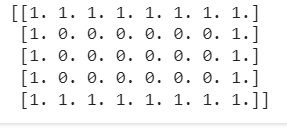

Reverse the rows of a 2D array.

Reverse the rows and columns of a 2D array.

Create a random vector of size 10 and replace the maximum value with 0.

Create a 5x5 matrix with row values ranging from 0 to 4.



#Commonly used functions

np.array: Create an array from a Python list or tuple.

np.shape: Get the dimensions of an array.

np.reshape: Reshape an array.

np.concatenate: Concatenate arrays.

np.sum, np.mean, np.median: Calculate sum, mean, and median.

np.min, np.max: Find minimum and maximum values.

np.random.rand, np.random.randn: Generate random numbers.

np.random.randint: Generate random integers.

np.dot: Dot product of two arrays.

np.linalg.inv: Inverse of a matrix.

(Try np.linalg.det.)

np.std: Standard deviation.

np.corrcoef: Correlation coefficient.

np.where: Condition-based array indexing.

Rough works

In [ ]:
import numpy as np
np.random.random((2, 2))

array([[0.35566806, 0.34957171],
       [0.2376949 , 0.01042013]])

In [ ]:
a=np.random.rand(2, 2)
a.mean()
a.std()

0.19345868809649308

In [ ]:
a=np.random.randn(2, 2)
a.mean()
a.std()

0.9049120544037569

In [ ]:
np.random.rand(3, 2)

array([[0.50112046, 0.07205113],
       [0.26843898, 0.4998825 ],
       [0.67923   , 0.80373904]])

In [ ]:
np.random.seed(7)
np.random.rand(3, 2)

array([[0.07630829, 0.77991879],
       [0.43840923, 0.72346518],
       [0.97798951, 0.53849587]])

In [ ]:
np.random.rand(3, 2)

array([[0.50112046, 0.07205113],
       [0.26843898, 0.4998825 ],
       [0.67923   , 0.80373904]])

In [ ]:
rows, cols = 5, 8

array = np.ones((rows, cols))
array[1:-1, 1:-1] = 0

print(array)

In [ ]:
import numpy as np
array_2d = np.array([[1, 2, 3],
                     [4, 5, 6],
                     [7, 8, 9]])

array_2d[::-1]
# array_2d[::-1, ::-1]

array([[7, 8, 9],
       [4, 5, 6],
       [1, 2, 3]])

In [ ]:
import numpy as np
a = np.arange(15)
np.set_printoptions(threshold=15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])